In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import desimodel.focalplane
import desimodel.io
from astropy.table import Table
from desitarget.targetmask import desi_mask, obsconditions
%matplotlib inline

In [2]:
workdir = os.path.join(os.environ['SCRATCH'], 'desi', 'test', 'fiberassign')
os.makedirs(workdir, exist_ok=True)
os.chdir(workdir)

In [3]:
!pwd

/global/cscratch1/sd/forero/desi/test/fiberassign


In [4]:
ntiles = 2
tiles = Table()
tile_radius = desimodel.focalplane.get_tile_radius_deg()
tiles['TILEID'] = np.arange(ntiles, dtype='i4')
tiles['RA'] = 2 + np.arange(ntiles)*0.5*tile_radius
tiles['DEC'] = np.ones(ntiles)*30
tiles['PASS'] = np.zeros(ntiles, dtype='i2')
tiles['OBSCONDITIONS'] = np.ones(ntiles, dtype='i4') * obsconditions.DARK
tiles['IN_DESI'] = np.ones(ntiles, dtype='i2')
tiles['PROGRAM'] = np.full(ntiles, 'DARK', dtype='S6')
tiles.write('tiles.fits', format='fits', overwrite=True)

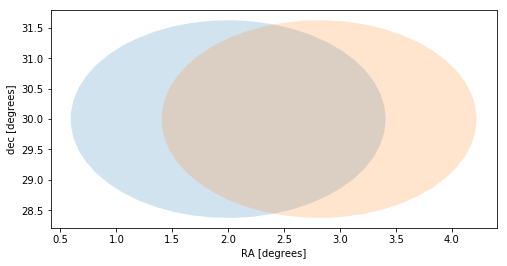

In [16]:
def plot_sky_circle(ra, dec, radius=0.1, alpha=0.2):
    theta = np.linspace(0, 2*np.pi, 50)
    xx = ra + np.cos(np.radians(dec))*radius*np.cos(theta)
    yy = dec + radius*np.sin(theta)
    plt.fill(xx, yy, alpha=alpha)

def plot_circle(ra, dec, radius=0.1, alpha=0.2):
    plot_sky_circle(ra, dec, radius=radius, alpha=alpha)

def plot_circles(ra, dec, radius=0.1, alpha=0.2):
    for i in range(len(ra)):
        plot_circle(ra[i], dec[i], radius=radius, alpha=alpha)
    plt.xlabel('RA [degrees]')
    plt.ylabel('dec [degrees]')

plt.figure(figsize=(8,4))
plot_circles(tiles['RA'], tiles['DEC'], radius=desimodel.focalplane.get_tile_radius_deg())

Text(0,0.5,'dec [degrees]')

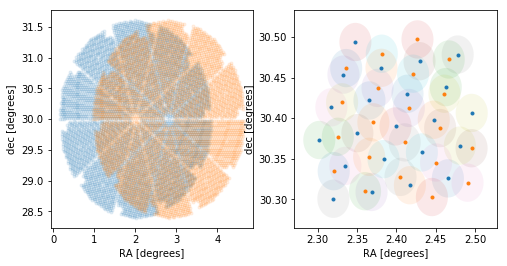

In [36]:
def plot_positioners(tilera, tiledec, boundary=None, alpha=0.1, circles=False):
    fiberpos = desimodel.io.load_fiberpos()
    ra, dec = desimodel.focalplane.xy2radec(tilera, tiledec, fiberpos['X'], fiberpos['Y'])
    if boundary is not None:
        ii = (ra<boundary['max_ra'])&(ra>boundary['min_ra'])&(dec<boundary['max_dec'])&(dec>boundary['min_dec'])
        ra = ra[ii]
        dec = dec[ii]
        
    plt.plot(ra, dec, '.', alpha=alpha)
    if circles == True:
        fiber_radius = desimodel.io.load_desiparams()['positioners']['radius_max']
        fiber_radius *= desimodel.focalplane.get_tile_radius_deg()/desimodel.focalplane.get_tile_radius_mm()
        plot_circles(ra, dec, radius=fiber_radius, alpha=0.1)



plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
for i in range(len(tiles)):
    plot_positioners(tiles['RA'][i], tiles['DEC'][i])

plt.xlabel('RA [degrees]')
plt.ylabel('dec [degrees]')

min_ra = 2.3
max_ra = 2.5
min_dec = 30.3
max_dec = 30.5
boundary = {'min_ra':min_ra, 'min_dec':min_dec, 'max_ra':max_ra, 'max_dec':max_dec}
plt.subplot(1,2,2)
for i in range(len(tiles)):
    plot_positioners(tiles['RA'][i], tiles['DEC'][i], boundary=boundary, alpha=1.0, circles=True)

plt.xlabel('RA [degrees]')
plt.ylabel('dec [degrees]')